## Order of operations

1. Gadid specimen get in CLAMS2ABL based on genetic IDs provided by Sharon Wildes (ArcticEIS repo, specimenCorrections modelLen.py)
2. Run MBA for 201701 and 201901
3. Export the following tables:
    - catchData
        - mbaCatchResults (mbaCatchResults.sql)
        - v_aeis_catch_summary_v2
        - v_aeis_events
        - v_aeis_specimen
            - Build trawl selectivity tables:
                - Add consistent lengths for all gadid specimen (Arctic EIS repo, specimenCorrections addCommonLength.py)
                - Export Basket and sample tables from CLAMS2ABL:
                    `select * from baskets where (ship = 175 and (survey = 201701 or survey = 201901)) or (ship = 174)`
                    `select * from samples where (ship = 175 and (survey = 201701 or survey = 201901)) or (ship = 174)`
                - Add expansion values to the table (Arctic EIS repo, trawlSelectivity buildSelectivityTable.ipynb)
        - AIERP_EventData (ArcticEIS, EventExport.sql)
            - Calculate volme filtered (aeisEvents EventData.ipynb)
    - acousticData
        - mbaIntegrationResults (mbaResultsExport.sql)
        - mbaSpeciesProp (see SQL code below)

### Methods

In [37]:
abs(geod.geometry_area_perimeter(poly1.difference(poly2))[0])/abs(geod.geometry_area_perimeter(poly1)[0])
print('overlap in 2019:',1-abs(geod.geometry_area_perimeter(poly1.difference(poly2))[0])/abs(geod.geometry_area_perimeter(poly2)[0]))


overlap in 2019: 0.9222009870487491


In [38]:
from pyproj import Geod
from shapely import wkt

# specify a named ellipsoid
# 2017
geod = Geod(ellps="WGS84")
poly1 = wkt.loads('''\
POLYGON ((-168.60846216444355 66.99715863755357,-168.7086763789516 72.08417422880358,-165.9694878490645 72.08417422880358,-165.3682025620161 72.53302854567858,-157.41787487770966 72.57577657585715,-157.0170180196774 71.95593013826786,-157.65170804489514 70.97272544416072,
-160.55792026562904 70.35287900657143,-163.93179882073386 69.946772719875,-164.13222724975 69.5192924180893,-166.40374944526613 68.49333969380356,-165.9026783727258 68.04448537692856,-164.46627463144355 67.55288302987499,-164.70010779862903 66.954410607375,-168.60846216444355 66.99715863755357))''')
area = abs(geod.geometry_area_perimeter(poly1)[0])/1e+6
print('# Geodesic area 2017: {:.3f} km^2'.format(area))
print('overlap in 2017:',1-abs(geod.geometry_area_perimeter(poly1.difference(poly2))[0])/abs(geod.geometry_area_perimeter(poly1)[0]))

poly2 = wkt.loads('''\
POLYGON ((-168.60107787551613 66.49453132622024,-168.60107787551613 72.5133516521131,-160.24014568166936 72.47401295717262,-159.32608878587902 72.98541599139881,-156.79899030928226 72.65103708440476,-157.12159862544354 71.76591644824404,-157.49797499429837 70.95947320196429,
-163.95014131752419 70.192368650625,-164.08456144925805 69.5236108366369,-165.42876276659678 69.18923192964286,-166.93426824201612 68.81551432770833,-166.77296408393548 68.40245803083333,-165.75137108275806 68.12708716624999,-164.5684739235 67.22229718261904,-165.99332731987903 66.41585393633929,-168.60107787551613 66.49453132622024))''')
area = abs(geod.geometry_area_perimeter(poly2)[0])/(1000*1000)
print('# Geodesic area 2019: {:.3f} km^2'.format(area))
print('overlap in 2019:',1-abs(geod.geometry_area_perimeter(poly1.difference(poly2))[0])/abs(geod.geometry_area_perimeter(poly2)[0]))

# Geodesic area 2017: 148994.181 km^2
overlap in 2017: 0.9195896511652564
# Geodesic area 2019: 153995.194 km^2
overlap in 2019: 0.9222009870487491


In [9]:
148994.181/(1/0.29155309240537)

43439.71422095542

In [1]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob

reading files...
mean bottom depth:  46.015761131695015
min bottom depth:  10.293944
max bottom depth:  278.056195
% shallower than  50  m:  76.05545053560176


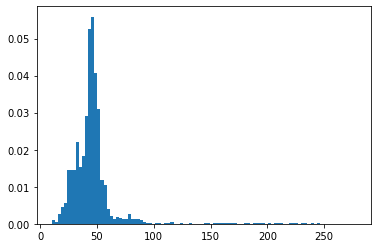

In [11]:
import numpy as np
import pandas as pd
from glob import glob
def bottomDepths(files,refDepth):
    print('reading files...')
    hold = []
    for filename in files:
        df = pd.read_csv(filename, index_col=None, header=0)
        hold.append(df)
    df = pd.concat(hold, axis=0, ignore_index=True)
    bD = df.Exclude_below_line_depth_mean.values
    bD[bD == -9999.0] = np.nan
    bD = bD+0.5
    print('mean bottom depth: ',np.nanmean(bD))
    print('min bottom depth: ',np.nanmin(bD))
    print('max bottom depth: ',np.nanmax(bD))
    print('% shallower than ',refDepth,' m: ',(len(np.where(bD < refDepth)[0])/len(bD))*100)
    plt.hist(bD, bins=100, density=True)
    return df

files17 = glob('../data/acousticData/2017_2019/EV/2017/Echoview/exports/5m/*(intervals).csv')
files19 = glob('../data/acousticData/2017_2019/EV/2019/Echoview/exports/5m/*(intervals).csv')
bD = bottomDepths(files17,50)

In [ ]:
fig = plt.figure()
files = glob('../data/acousticData/2017_2019/EV/2019/Echoview/exports/5m/*(intervals).csv')
a = pd.concat(map(lambda file: pd.read_csv(file), files))
a = a[(a.Lat_S < 999) & (a.Lon_S < 999)]
plt.plot(a.Lon_S, a.Lat_S,'.')
pts = plt.ginput(15)
c = [str(b[0])+' '+str(b[1]) for b in pts]
d = ','
d.join(c)

In [2]:
# Transit speed
import pandas as pd
from glob import glob
import numpy as np

files = glob('../data/acousticData/2017_2019/EV/2017/Echoview/exports/5m/*(intervals).csv')
a = pd.concat(map(lambda file: pd.read_csv(file), files))
a['Datetime_S'] = pd.to_datetime(a['Date_S'].astype(str)+a['Time_S'])
a['Datetime_E'] = pd.to_datetime(a['Date_E'].astype(str)+a['Time_E'])
a['Duration'] = (a.Datetime_E- a.Datetime_S).dt.total_seconds()
a['Dist'] = a['VL_end']-a['VL_start']
a['Speed'] = a.Dist*1852/a.Duration
print('2017 transit speed (m/s): ',a.Speed.mean())
print(sum((a.Dist)*(30)))

from glob import glob
files = glob('../data/acousticData/2017_2019/EV/2019/Echoview/exports/5m/*(intervals).csv')
a = pd.concat(map(lambda file: pd.read_csv(file), files))
a['Datetime_S'] = pd.to_datetime(a['Date_S'].astype(str)+' '+a['Time_S'])
a['Datetime_E'] = pd.to_datetime(a['Date_E'].astype(str)+' '+a['Time_E'])
a['Duration'] = (a.Datetime_E- a.Datetime_S).dt.total_seconds()
a['Dist'] = a['VL_end']-a['VL_start']
a['Speed'] = a.Dist*1852/a.Duration
print('2019 transit speed (m/s): ',a.Speed.mean())
print(sum((a.Dist)*(45)))

2017 transit speed (m/s):  3.3434855897494025
94412.59568999776
2019 transit speed (m/s):  3.420634502352993
118335.03655499949


In [34]:
# Calibration
# From the E:\ChukchiTimeSeries\data\acousticData\2017_2019\EV\2019\calibration\Ocean Starr EK60 cals AFSC.xslx spreadhseet

# 38 kHz 512
# 2017 
# Cal1: 25.23, -0.88
# Cal2: 25.00, -0.83
print('2017, 38 @ .512: ',round(10*np.log10(((10**(25.23/10))+(10**(25.00/10)))/2),3),round(10*np.log10(((10**(-.88/10))+(10**(-.83/10)))/2),3))

# 2019
# Cal1: 25.17, -0.84
# Cal2: 25.15, -0.76
print('2019, 38 @ .512: ',round(10*np.log10(((10**(25.17/10))+(10**(25.15/10)))/2),3),round(10*np.log10(((10**(-.84/10))+(10**(-.76/10)))/2),3))


print(1-(10**((25.117-.855)/10))/(10**((25.16-.8)/10)))

# 38 kHz 4
# 2017 (only 1 cal) 25.32,-0.24
print('2017, 38 @ 4.0: ',25.32,-0.24)

# 2019
# Cal1: 25.25, -0.28
# Cal2: 25.48, -0.28
print('2019, 38 @ 4.0: ',round(10*np.log10(((10**(25.25/10))+(10**(25.48/10)))/2),3),round(10*np.log10(((10**(-.28/10))+(10**(-.28/10)))/2),3))

print(1-(10**((25.32 -0.24)/10))/(10**((25.367 -0.28)/10)))

2017, 38 @ .512:  25.117 -0.855
2019, 38 @ .512:  25.16 -0.8
0.02231264103257835
2017, 38 @ 4.0:  25.32 -0.24
2019, 38 @ 4.0:  25.367 -0.28
0.0016105112976727565


In [36]:
# 120 kHz 512
# 2017 
# Cal1: 25.07, -0.41
# Cal2: 24.49, -0.51
print('2017, 120 @ .512: ',round(10*np.log10(((10**(25.07/10))+(10**(24.49/10)))/2),3),round(10*np.log10(((10**(-.41/10))+(10**(-.51/10)))/2),3))

# 2019
# Cal1: 25.39, -0.46
# Cal2: 24.48, -0.44
print('2019, 120 @ .512: ',round(10*np.log10(((10**(25.39/10))+(10**(24.48/10)))/2),3),round(10*np.log10(((10**(-.46/10))+(10**(-.44/10)))/2),3))

print(1-(10**((24.79 -0.46)/10))/(10**((24.959 -0.45)/10)))

# 120 kHz 1
# 2017 (only 1 cal) 24.56, -0.39
print('2017, 120 @ 1: ',24.56, -0.39)

# 2019
# Cal1: 25.36, -0.35
# Cal2: 24.46, -0.36
print('2019, 120 @ 1: ',round(10*np.log10(((10**(25.36/10))+(10**(24.46/10)))/2),3),round(10*np.log10(((10**(-.35/10))+(10**(-.36/10)))/2),3))

print(1-(10**((24.56 -0.39)/10))/(10**((24.933 -0.355)/10)))

2017, 120 @ .512:  24.79 -0.46
2019, 120 @ .512:  24.959 -0.45
0.04037843288965892
2017, 120 @ 1:  24.56 -0.39
2019, 120 @ 1:  24.933 -0.355
0.08966760032009014


In [190]:
# Net Openings
b = pd.read_csv('../data/catchData/2017_2019/AIERP_EventData.csv')
print('2017 vert opening +STD: ',b[b.SURVEY==201701].AVG_NET_VERT_OPENING.mean(),b[b.SURVEY==201701].AVG_NET_VERT_OPENING.std())
print('2017 hori opening +STD: ',b[b.SURVEY==201701].AVG_NET_HORI_OPENING.mean(),b[b.SURVEY==201701].AVG_NET_HORI_OPENING.std())
print('2019 vert opening +STD: ',b[b.SURVEY==201901].AVG_NET_VERT_OPENING.mean(),b[b.SURVEY==201901].AVG_NET_VERT_OPENING.std())
print('2019 hori opening +STD: ',b[b.SURVEY==201901].AVG_NET_HORI_OPENING.mean(),b[b.SURVEY==201901].AVG_NET_HORI_OPENING.std())
print('2017 HR mean, min, max :',b[b.SURVEY==201701].AVG_HEAD_ROPE_DEPTH.mean(),b[b.SURVEY==201701].AVG_HEAD_ROPE_DEPTH.min(),b[b.SURVEY==201701].AVG_HEAD_ROPE_DEPTH.max())
print('2019 HR mean, min, max :',b[b.SURVEY==201901].AVG_HEAD_ROPE_DEPTH.mean(),b[b.SURVEY==201901].AVG_HEAD_ROPE_DEPTH.min(),b[b.SURVEY==201901].AVG_HEAD_ROPE_DEPTH.max())

2017 vert opening +STD:  8.280166666666666 1.12605543084403
2017 hori opening +STD:  7.559833333333334 0.9346034410133652
2019 vert opening +STD:  7.533414634146343 0.5061650410493478
2019 hori opening +STD:  7.449062499999999 0.3429413509060847
2017 HR mean, min, max : 27.12212121212121 11.46 46.78
2019 HR mean, min, max : 34.98837209302326 13.27 227.9


In [222]:
# Number of CTD Stations
c = pd.read_csv('catchAnalysis/analysisFiles/dfStat.csv')
c = c[(~c.meanSa.isnull())&(~c.meanAcod.isnull())&(~c.meanPol.isnull())&(~c.meanCap.isnull())]
print('# CTD per year: ',len(c[c.Year == 2012]),len(c[c.Year == 2013]),len(c[c.Year == 2017]),len(c[c.Year == 2019]))

# CTD per year:  68 55 39 46


### Results

In [3]:
# CPUE
dfEvents = pd.read_csv('../data/catchData/2017_2019/AIERP_EventData.csv')
catch = pd.read_csv('../data/catchData/2017_2019/catchExport.csv')
events = pd.read_csv('../data/catchData/2017_2019/eventExport.csv')

dfCatch = catch[(catch.GEAR == 'Marinovich') & (catch.SPECIES_CODE <40000) & (catch.SURVEY==201701)].merge(dfEvents, how='left',  left_on=['SURVEY','CLAMS_EVENT_NUMBER'],   right_on=['SURVEY','EVENT_ID'])
dfCatch['CPUE'] = dfCatch.TOTAL_NUMBER_IN_HAUL/dfCatch.VOL_FILTERED
dfCatch = dfCatch.groupby(by=['CLAMS_EVENT_NUMBER']).sum()
print('2017 All fishes ',dfCatch.CPUE.mean())


dfCatch = catch[(catch.GEAR == 'Marinovich') & (catch.SPECIES_CODE ==21725) & (catch.SURVEY==201701)].merge(dfEvents, how='left',  left_on=['SURVEY','CLAMS_EVENT_NUMBER'],   right_on=['SURVEY','EVENT_ID'])
dfCatch['CPUE'] = dfCatch.TOTAL_NUMBER_IN_HAUL/dfCatch.VOL_FILTERED
dfCatch = dfCatch.groupby(by=['CLAMS_EVENT_NUMBER']).sum()
print('2017 All Arctic Cod ',dfCatch.CPUE.mean())

dfCatch = catch[(catch.GEAR == 'Marinovich') & (catch.SPECIES_CODE <40000) & (catch.SURVEY==201901)].merge(dfEvents, how='left',  left_on=['SURVEY','CLAMS_EVENT_NUMBER'],   right_on=['SURVEY','EVENT_ID'])
dfCatch['CPUE'] = dfCatch.TOTAL_NUMBER_IN_HAUL/dfCatch.VOL_FILTERED
dfCatch = dfCatch.groupby(by=['CLAMS_EVENT_NUMBER']).sum()
print('2019 All fishes ',dfCatch.CPUE.mean())


dfCatch = catch[(catch.GEAR == 'Marinovich') & (catch.SPECIES_CODE ==21725) & (catch.SURVEY==201901)].merge(dfEvents, how='left',  left_on=['SURVEY','CLAMS_EVENT_NUMBER'],   right_on=['SURVEY','EVENT_ID'])
dfCatch['CPUE'] = dfCatch.TOTAL_NUMBER_IN_HAUL/dfCatch.VOL_FILTERED
dfCatch = dfCatch.groupby(by=['CLAMS_EVENT_NUMBER']).sum()
print('2019 All Arctic Cod ',dfCatch.CPUE.mean())

2017 All fishes  0.24789253188085802
2017 All Arctic Cod  0.20975026751475034
2019 All fishes  0.03478787966128983
2019 All Arctic Cod  0.01788178450288881


In [257]:
# Lengths from catch
a = pd.read_csv('../data/catchData/2017_2019/specimen_complete_selectivity.csv')
import matplotlib.pyplot as plt
b = a[(a.SURVEY==201701)&(~a.CONSISTENT_LENGTH.isnull())].CONSISTENT_LENGTH.values
print('2017 length of 80 percentile: ',np.percentile(b,80))
b = a[(a.SURVEY==201901)&(~a.CONSISTENT_LENGTH.isnull())].CONSISTENT_LENGTH.values
print('2019 length of 80 percentile: ',np.percentile(b,80))

2017 length of 80 percentile:  7.3
2019 length of 80 percentile:  8.0


In [11]:
# Abundance and biomass from catch
a = pd.read_csv('../data/catchData/2017_2019/catchExport.csv')
a = a[((a.GEAR == 'Marinovich')|(a.GEAR == 'CanTrawl')) & (a.NET_PARTITION == 'Codend')]
a = a[a.SURVEY == 2012001]
a = a[(a.SPECIES_CODE >=1200)&(a.SPECIES_CODE < 60000)]
aJel = np.unique(a[(a.SPECIES_CODE > 40000) & (a.SPECIES_CODE  < 50000)].SPECIES_CODE.values)# jellyfish
aGad = np.unique( a[((a.SPECIES_CODE> 21700) & (a.SPECIES_CODE < 21750)) | (a.SPECIES_CODE == 1202)].SPECIES_CODE.values) # gadids    
aSan =  np.unique(a[(a.SPECIES_CODE >= 20202) & (a.SPECIES_CODE <= 20204)].SPECIES_CODE.values) # sand lance
aStic =  np.unique(a[(a.SPECIES_CODE >= 23800) & (a.SPECIES_CODE <= 23810)].SPECIES_CODE.values) # prickleback
aCap =  np.unique(a[(a.SPECIES_CODE== 23041)].SPECIES_CODE.values) # capelin
aHer =  np.unique(a[(a.SPECIES_CODE == 21110)].SPECIES_CODE.values) # herring
print('2012')
print('% fish abundance:', a[a.SPECIES_CODE.isin(np.concatenate([aGad,aSan,aStic,aCap,aHer]))].TOTAL_NUMBER_IN_HAUL.sum()/a.TOTAL_NUMBER_IN_HAUL.sum())
print('% Gad,cap,her abundance:', a[a.SPECIES_CODE.isin(np.concatenate([aGad,aCap,aHer]))].TOTAL_NUMBER_IN_HAUL.sum()/a.TOTAL_NUMBER_IN_HAUL.sum())
print('% fish weight:', a[a.SPECIES_CODE.isin(np.concatenate([aGad,aSan,aStic,aCap,aHer]))].TOTAL_WEIGHT_IN_HAUL.sum()/a.TOTAL_WEIGHT_IN_HAUL.sum())
print('% jelly abundance:', a[a.SPECIES_CODE.isin(aJel)].TOTAL_NUMBER_IN_HAUL.sum()/a.TOTAL_NUMBER_IN_HAUL.sum())
print('% jelly weight:', a[a.SPECIES_CODE.isin(aJel)].TOTAL_WEIGHT_IN_HAUL.sum()/a.TOTAL_WEIGHT_IN_HAUL.sum())
print('C. melanaster: ',a[a.SPECIES_CODE==40504].TOTAL_WEIGHT_IN_HAUL.sum()/a[a.SPECIES_CODE.isin(aJel)].TOTAL_WEIGHT_IN_HAUL.sum())


# Abundance and biomass from catch
a = pd.read_csv('../data/catchData/2017_2019/catchExport.csv')
a = a[((a.GEAR == 'Marinovich')|(a.GEAR == 'CanTrawl')) & (a.NET_PARTITION == 'Codend')]
a = a[a.SURVEY == 2013001]
a = a[(a.SPECIES_CODE >=1200)&(a.SPECIES_CODE < 60000)]
aJel = np.unique(a[(a.SPECIES_CODE > 40000) & (a.SPECIES_CODE  < 50000)].SPECIES_CODE.values)# jellyfish
aGad = np.unique( a[((a.SPECIES_CODE> 21700) & (a.SPECIES_CODE < 21750)) | (a.SPECIES_CODE == 1202)].SPECIES_CODE.values) # gadids    
aSan =  np.unique(a[(a.SPECIES_CODE >= 20202) & (a.SPECIES_CODE <= 20204)].SPECIES_CODE.values) # sand lance
aStic =  np.unique(a[(a.SPECIES_CODE >= 23800) & (a.SPECIES_CODE <= 23810)].SPECIES_CODE.values) # prickleback
aCap =  np.unique(a[(a.SPECIES_CODE== 23041)].SPECIES_CODE.values) # capelin
aHer =  np.unique(a[(a.SPECIES_CODE == 21110)].SPECIES_CODE.values) # herring
print('2013')
print('% fish abundance:', a[a.SPECIES_CODE.isin(np.concatenate([aGad,aSan,aStic,aCap,aHer]))].TOTAL_NUMBER_IN_HAUL.sum()/a.TOTAL_NUMBER_IN_HAUL.sum())
print('% Gad,cap,her abundance:', a[a.SPECIES_CODE.isin(np.concatenate([aGad,aCap,aHer]))].TOTAL_NUMBER_IN_HAUL.sum()/a.TOTAL_NUMBER_IN_HAUL.sum())
print('% fish weight:', a[a.SPECIES_CODE.isin(np.concatenate([aGad,aSan,aStic,aCap,aHer]))].TOTAL_WEIGHT_IN_HAUL.sum()/a.TOTAL_WEIGHT_IN_HAUL.sum())
print('% jelly abundance:', a[a.SPECIES_CODE.isin(aJel)].TOTAL_NUMBER_IN_HAUL.sum()/a.TOTAL_NUMBER_IN_HAUL.sum())
print('% jelly weight:', a[a.SPECIES_CODE.isin(aJel)].TOTAL_WEIGHT_IN_HAUL.sum()/a.TOTAL_WEIGHT_IN_HAUL.sum())
print('C. melanaster: ',a[a.SPECIES_CODE==40504].TOTAL_WEIGHT_IN_HAUL.sum()/a[a.SPECIES_CODE.isin(aJel)].TOTAL_WEIGHT_IN_HAUL.sum())

2012
% fish abundance: 0.9522844828607858
% Gad,cap,her abundance: 0.947263986489976
% fish weight: 0.4480938138731442
% jelly abundance: 0.02619677417103569
% jelly weight: 0.5291975118480747
C. melanaster:  0.9896329107693402
2013
% fish abundance: 0.8730348247786125
% Gad,cap,her abundance: 0.8386735000776657
% fish weight: 0.18414039341960067
% jelly abundance: 0.03985783583825937
% jelly weight: 0.7597752247689785
C. melanaster:  0.9404935175553627


In [7]:
a = pd.read_csv('../data/catchData/2017_2019/catchExport.csv')
a

,SHIP,SURVEY,CLAMS_EVENT_NUMBER,CLAMS_STATION_NUMBER,GRID_STATION_NAME,GEAR,NET_PARTITION,CATCH_SAMPLE_NUMBER,SPECIES_CODE,COMMON_NAME,SCIENTIFIC_NAME,SPECIES_SUBCATEGORY,TOTAL_WEIGHT_IN_HAUL,SAMPLED_WEIGHT,TOTAL_NUMBER_IN_HAUL,SAMPLED_NUMBER,FREQUENCY_EXPANSION,SAMPLED_IN_MIX,WHOLE_HAULED,COMMENTS
0,174,2012001,3,1.0,CH-A01,CanTrawl,Codend,162,23041,Capelin,Mallotus villosus,None,0.2600,0.084,148.5714,48,3.0952,0,1,NaN
1,174,2012001,3,1.0,CH-A01,CanTrawl,Codend,166,40511,Aurelia sp.,Aurelia sp.,None,0.0300,0.030,0.0000,0,1.0000,0,1,NaN
2,174,2012001,7,3.0,CH-A02,CanTrawl,Codend,168,21110,Pacific herring,Clupea pallasi,None,682.6600,13.260,7104.6063,138,51.4827,0,1,NaN
3,174,2012001,7,3.0,CH-A02,CanTrawl,Codend,169,23235,Chum salmon (juv),Oncorhynchus keta,Immature,11.4600,11.460,4.0000,4,1.0000,0,1,NaN
4,174,2012001,7,3.0,CH-A02,CanTrawl,Codend,170,40504,Chrysaora melanaster,Chrysaora melanaster,None,5.0400,2.160,7.0000,3,2.3333,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,175,201901,407,999.0,CH-B01,3m Beam Trawl,Codend,3403,72539,Margarites beringensis,Margarites beringensis,None,0.0251,0.004,87.7820,14,6.2701,1,0,NaN
6804,175,201901,407,999.0,CH-B01,3m Beam Trawl,Codend,3404,72757,Buccinum ciliatum,Buccinum ciliatum,None,0.0188,0.003,6.2701,1,6.2701,1,0,NaN
6805,175,201901,407,999.0,CH-B01,3m Beam Trawl,Codend,3405,1151,Boreotrophon truncatus,Boreotrophon truncatus,None,0.0125,0.002,12.5403,2,6.2701,1,0,NaN
6806,175,201901,407,999.0,CH-B01,3m Beam Trawl,Codend,3406,71631,Tachyrhynchus sp.,Tachyrhynchus sp.,None,0.0063,0.001,6.2701,1,6.2701,1,0,NaN


In [7]:
# Abundance and biomass from catch
a = pd.read_csv('../data/catchData/2017_2019/catchExport.csv')
a = a[(a.GEAR == 'Marinovich') & (a.NET_PARTITION == 'Codend')]
a = a[a.SURVEY == 201701]
a = a[(a.SPECIES_CODE >=1200)&(a.SPECIES_CODE < 60000)]
aJel = np.unique(a[(a.SPECIES_CODE > 40000) & (a.SPECIES_CODE  < 50000)].SPECIES_CODE.values)# jellyfish
aGad = np.unique( a[((a.SPECIES_CODE> 21700) & (a.SPECIES_CODE < 21750)) | (a.SPECIES_CODE == 1202)].SPECIES_CODE.values) # gadids    
aSan =  np.unique(a[(a.SPECIES_CODE >= 20202) & (a.SPECIES_CODE <= 20204)].SPECIES_CODE.values) # sand lance
aStic =  np.unique(a[(a.SPECIES_CODE >= 23800) & (a.SPECIES_CODE <= 23810)].SPECIES_CODE.values) # prickleback
aCap =  np.unique(a[(a.SPECIES_CODE== 23041)].SPECIES_CODE.values) # capelin
aHer =  np.unique(a[(a.SPECIES_CODE == 21110)].SPECIES_CODE.values) # herring
print('2017')
print('% fish abundance:', a[a.SPECIES_CODE.isin(np.concatenate([aGad,aSan,aStic,aCap,aHer]))].TOTAL_NUMBER_IN_HAUL.sum()/a.TOTAL_NUMBER_IN_HAUL.sum())
print('% Gad,cap,her abundance:', a[a.SPECIES_CODE.isin(np.concatenate([aGad,aCap,aHer]))].TOTAL_NUMBER_IN_HAUL.sum()/a.TOTAL_NUMBER_IN_HAUL.sum())
print('% fish weight:', a[a.SPECIES_CODE.isin(np.concatenate([aGad,aSan,aStic,aCap,aHer]))].TOTAL_WEIGHT_IN_HAUL.sum()/a.TOTAL_WEIGHT_IN_HAUL.sum())
print('% jelly abundance:', a[a.SPECIES_CODE.isin(aJel)].TOTAL_NUMBER_IN_HAUL.sum()/a.TOTAL_NUMBER_IN_HAUL.sum())
print('% jelly weight:', a[a.SPECIES_CODE.isin(aJel)].TOTAL_WEIGHT_IN_HAUL.sum()/a.TOTAL_WEIGHT_IN_HAUL.sum())
print('C. melanaster: ',a[a.SPECIES_CODE==40504].TOTAL_WEIGHT_IN_HAUL.sum()/a[a.SPECIES_CODE.isin(aJel)].TOTAL_WEIGHT_IN_HAUL.sum())

a = pd.read_csv('../data/catchData/2017_2019/catchExport.csv')
a = a[(a.GEAR == 'Marinovich') & (a.NET_PARTITION == 'Codend')]
a = a[a.SURVEY == 201901]
a = a[(a.SPECIES_CODE >=1200)&(a.SPECIES_CODE < 60000)]
aJel = np.unique(a[(a.SPECIES_CODE > 40000) & (a.SPECIES_CODE  < 50000)].SPECIES_CODE.values)# jellyfish
aGad = np.unique( a[((a.SPECIES_CODE> 21700) & (a.SPECIES_CODE < 21750)) | (a.SPECIES_CODE == 1202)].SPECIES_CODE.values) # gadids    
aSan =  np.unique(a[(a.SPECIES_CODE >= 20202) & (a.SPECIES_CODE <= 20204)].SPECIES_CODE.values) # sand lance
aStic =  np.unique(a[(a.SPECIES_CODE >= 23800) & (a.SPECIES_CODE <= 23810)].SPECIES_CODE.values) # prickleback
aCap =  np.unique(a[(a.SPECIES_CODE== 23041)].SPECIES_CODE.values) # capelin
aHer =  np.unique(a[(a.SPECIES_CODE == 21110)].SPECIES_CODE.values) # herring
print('2019')
print('% fish abundance:', a[a.SPECIES_CODE.isin(np.concatenate([aGad,aSan,aStic,aCap,aHer]))].TOTAL_NUMBER_IN_HAUL.sum()/a.TOTAL_NUMBER_IN_HAUL.sum())
print('% Gad,cap,her abundance:', a[a.SPECIES_CODE.isin(np.concatenate([aGad,aCap,aHer]))].TOTAL_NUMBER_IN_HAUL.sum()/a.TOTAL_NUMBER_IN_HAUL.sum())
print('% fish weight:', a[a.SPECIES_CODE.isin(np.concatenate([aGad,aSan,aStic,aCap,aHer]))].TOTAL_WEIGHT_IN_HAUL.sum()/a.TOTAL_WEIGHT_IN_HAUL.sum())
print('% jelly abundance:', a[a.SPECIES_CODE.isin(aJel)].TOTAL_NUMBER_IN_HAUL.sum()/a.TOTAL_NUMBER_IN_HAUL.sum())
print('% jelly weight:', a[a.SPECIES_CODE.isin(aJel)].TOTAL_WEIGHT_IN_HAUL.sum()/a.TOTAL_WEIGHT_IN_HAUL.sum())
print('C. melanaster: ',a[a.SPECIES_CODE==40504].TOTAL_WEIGHT_IN_HAUL.sum()/a[a.SPECIES_CODE.isin(aJel)].TOTAL_WEIGHT_IN_HAUL.sum())

2017
% fish abundance: 0.9863232129731636
% Gad,cap,her abundance: 0.9627595542267834
% fish weight: 0.16028538733154946
% jelly abundance: 0.007698121572572092
% jelly weight: 0.8383359547173879
C. melanaster:  0.6088457142338402
2019
% fish abundance: 0.9342907275666883
% Gad,cap,her abundance: 0.6369994922285663
% fish weight: 0.06770644265539377
% jelly abundance: 0.05539703561310407
% jelly weight: 0.93123636563934
C. melanaster:  0.5839014769756139


In [15]:
# Backscatter
import numpy as np
import pandas as pd
df2012Summary = pd.read_csv('../data/acousticData/2012_2013/Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2012_v3.csv')
df2013Summary = pd.read_csv('../data/acousticData/2012_2013/Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2013_v3.csv')
df2017Summary = pd.read_csv('../data/acousticData/2017_2019/Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2017.csv')
df2018Summary = pd.read_csv('../data/acousticData/2018/Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2018.csv')
df2019Summary = pd.read_csv('../data/acousticData/2017_2019/Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2019.csv')
print(np.mean(df2012Summary['Fish 38 kHz sA (m^2 nmi^-2)'][(df2012Summary.Latitude > 66) & (df2012Summary.Longitude < -156.7)]))# & (df2012Summary.Latitude  < 71.85)]))
print(np.mean(df2013Summary['Fish 38 kHz sA (m^2 nmi^-2)'][(df2013Summary.Latitude > 66)& (df2013Summary.Longitude < -156.7)]))# & (df2013Summary.Latitude  < 71.85)]))
print(np.mean(df2017Summary['Fish 38 kHz sA (m^2 nmi^-2)'][(df2017Summary.Latitude > 66)& (df2017Summary.Longitude < -156.7)]))# & (df2017Summary.Latitude  < 71.85)]))
print(np.mean(df2018Summary['Fish 38 kHz sA (m^2 nmi^-2)'][(df2018Summary.Latitude > 66)]))# & (df2018Summary.Latitude  < 71.85)]))
print(np.mean(df2019Summary['Fish 38 kHz sA (m^2 nmi^-2)'][(df2019Summary.Latitude > 66)& (df2019Summary.Longitude < -156.7)]))# & (df2019Summary.Latitude  < 71.85)]))
print('2017 is X times higher than the other years: ',1118.5/71.9,1118.5/257.5,1118.5/178.5,1118.5/354.8)

71.90508847228669
257.59256736688155
1119.9412134358256
178.53462277255952
355.22825272607355
2017 is X times higher than the other years:  15.556328233657856 4.343689320388349 6.266106442577031 3.152480270574972


In [23]:
a = pd.read_csv('../data/catchData/2017_2019/mbaCatchResults.csv')
a.SPECIES_CODE.unique()
#pollock
print('Pollock 2017:',a[(a.SURVEY==201701)&(a.SPECIES_CODE==21744)&(a.END_LONGITUDE <-156.7)].NUMBERS.sum())
print('Pollock 2019:',a[(a.SURVEY==201901)&(a.SPECIES_CODE==21744)&(a.END_LONGITUDE <-156.7)].NUMBERS.sum())
#arctic cod
print('Acod 2017:',a[(a.SURVEY==201701)&(a.SPECIES_CODE==21725)&(a.END_LONGITUDE <-156.7)].NUMBERS.sum())
print('Acod 2019:',a[(a.SURVEY==201901)&(a.SPECIES_CODE==21725)&(a.END_LONGITUDE <-156.7)].NUMBERS.sum())
# capelin
print('Capelin 2017:',a[(a.SURVEY==201701)&(a.SPECIES_CODE==23041)&(a.END_LONGITUDE <-156.7)].NUMBERS.sum())
print('Capelin 2019:',a[(a.SURVEY==201901)&(a.SPECIES_CODE==23041)&(a.END_LONGITUDE <-156.7)].NUMBERS.sum())

Pollock 2017: 72267247847.093
Pollock 2019: 57401559641.71512
Acod 2017: 877391394396.3812
Acod 2019: 125555744574.5253
Capelin 2017: 15846782605.369555
Capelin 2019: 3738074434.0081444


In [16]:
specs = [21725, 21744, 21740, 21735, 21720]
print('2017 Gadids:',a[(a.SURVEY==201701)&(a.SPECIES_CODE.isin(specs))].NUMBERS.sum()/a[(a.SURVEY==201701)].NUMBERS.sum())
print('2019 Gadids:',a[(a.SURVEY==201901)&(a.SPECIES_CODE.isin(specs))].NUMBERS.sum()/a[(a.SURVEY==201901)].NUMBERS.sum())

print('2017 Arctic cod:',a[(a.SURVEY==201701)&(a.SPECIES_CODE==21725)].NUMBERS.sum()/a[(a.SURVEY==201701)].NUMBERS.sum())
print('2019 Arctic cod:',a[(a.SURVEY==201901)&(a.SPECIES_CODE==21725)].NUMBERS.sum()/a[(a.SURVEY==201901)].NUMBERS.sum())

print('2017 Pollock:',a[(a.SURVEY==201701)&(a.SPECIES_CODE.isin([21740,21744]))].NUMBERS.sum()/a[(a.SURVEY==201701)].NUMBERS.sum())
print('2019 Pollock:',a[(a.SURVEY==201901)&(a.SPECIES_CODE.isin([21740,21744]))].NUMBERS.sum()/a[(a.SURVEY==201901)].NUMBERS.sum())

2017 Gadids: 0.9838883646443122
2019 Gadids: 0.9641131437639759
2017 Arctic cod: 0.8953858684823652
2019 Arctic cod: 0.6516882495320803
2017 Pollock: 0.0745312279899934
2019 Pollock: 0.29801677432207296


In [24]:
#Abundances by survey by species
for surv in a.SURVEY.unique():
    for spec in a.SPECIES_CODE.unique():
        print(surv,spec,a[(a.SURVEY==surv)&(a.SPECIES_CODE==spec)&(a.END_LONGITUDE <-156.7)].NUMBERS.sum()/10**10)

201701 23041 1.5846782605369554
201701 21744 7.2267247847093
201701 21725 87.73913943963812
201701 21720 0.9412550247454395
201701 21735 0.46004876872346534
201701 21110 0.0
201701 21740 0.0
201901 23041 0.37380744340081445
201901 21744 5.740155964171512
201901 21725 12.55557445745253
201901 21720 0.08921857967994705
201901 21735 0.18837154481527138
201901 21110 0.31742012372610956
201901 21740 0.0012176257066017209


In [1]:
import pandas as pd
import numpy as np
# lengths of arctic cod and pollock
df2012 = pd.read_csv('../data/catchData/2012_2013/Arctic_EIS_AT_survey_Arctic_cod_by_length_alongtrack_fish_per_m_squared_2012_v3.csv')
df2013 = pd.read_csv('../data/catchData/2012_2013/Arctic_EIS_AT_survey_Arctic_cod_by_length_alongtrack_fish_per_m_squared_2013_v3.csv')
df2017 = pd.read_csv('../data/catchData/2017_2019/Arctic_EIS_201701_21725.csv')
df2019 = pd.read_csv('../data/catchData/2017_2019/Arctic_EIS_201901_21725.csv')
print('2012 Acod:',sum(df2012[df2012.Latitude >=65.9].sum()[3:]/sum(df2012[df2012.Latitude >=65.9].sum()[3:])*np.arange(2,31,1)))
print('2013 Acod:',sum(df2013[df2013.Latitude >=65.9].sum()[3:]/sum(df2013[df2013.Latitude >=65.9].sum()[3:])*np.arange(2,31,1)))
print('2017 Acod:',sum(df2017.sum()[3:23]/sum(df2017.sum()[3:23])*np.arange(1,19,1)))
print('2019 Acod:',sum(df2019.sum()[3:23]/sum(df2019.sum()[3:23])*np.arange(1,21,1)))

#pollock
df2012 = pd.read_csv('../data/catchData/2012_2013/Arctic_EIS_AT_survey_pollock_by_length_alongtrack_fish_per_m_squared_2012_v3.csv')
df2013 = pd.read_csv('../data/catchData/2012_2013/Arctic_EIS_AT_survey_pollock_by_length_alongtrack_fish_per_m_squared_2013_v3.csv')
df2017 = pd.read_csv('../data/catchData/2017_2019/Arctic_EIS_201701_21744.csv')
df2019 = pd.read_csv('../data/catchData/2017_2019/Arctic_EIS_201901_21744.csv')
print('2012 pollock:',sum(df2012.sum()[3:23]/sum(df2012.sum()[3:23])*np.arange(2,22,1)))
print('2013 pollock:',sum(df2013.sum()[3:23]/sum(df2013.sum()[3:23])*np.arange(2,22,1)))
print('2017 pollock:',sum(df2017.sum()[3:23]/sum(df2017.sum()[3:23])*np.arange(1,19,1)))
print('2019 pollock:',sum(df2019.sum()[3:23]/sum(df2019.sum()[3:23])*np.arange(1,21,1)))

2012 Acod: 3.5271698674469336
2013 Acod: 3.55174105365163
2017 Acod: 4.408042066718216
2019 Acod: 4.808930212883881
2012 pollock: 4.971642230484027
2013 pollock: 6.828973597980371
2017 pollock: 5.107030595963149
2019 pollock: 5.068405358275401


### Proportion of acoustic backscatter attributed to the key species
```sql
select a.survey, b.event_id,a.interval,  a.layer,a.prc_nasc, c.species_code, c.sa_proportion
from 
(select * from integration_results) a
join
(select * from v_mean_sigma_by_interval_class) b
on a.interval = b.interval
and a.ship = b.ship
and a.survey = b.survey
join
(select * from scaling_key_sa_by_species) c
on b.event_id = c.event_id
and b.ship = c.ship
and b.survey = c.survey
where a.ship = 175 and (a.survey=201701 or a.survey = 201901)
order by a.interval, c.species_code
```

In [17]:
a = pd.read_csv('../data/acousticData/2017_2019/mbaSpeciesProp.csv')
a['NASC_SPECIES'] = a.PRC_NASC*a.SA_PROPORTION

c = a[a.SURVEY==201701]
b = c.groupby(by=['SPECIES_CODE']).sum().reset_index()
print('2017')
display(b.sort_values(by='NASC_SPECIES',ascending=False)[['SPECIES_CODE','NASC_SPECIES']].head(10))
specs = [21110, 23041, 21725, 21744, 21740, 21735, 21720]
b[b.SPECIES_CODE.isin(specs)].NASC_SPECIES.sum()/b.NASC_SPECIES.sum()
print('Prop key spec: ',b[b.SPECIES_CODE.isin(specs)].NASC_SPECIES.sum()/b.NASC_SPECIES.sum())
specs = [21725, 21744, 21740, 21735, 21720]
print('Prop gadid: ',b[b.SPECIES_CODE.isin(specs)].NASC_SPECIES.sum()/b.NASC_SPECIES.sum())
print('Prop jelly: ',b[(b.SPECIES_CODE>40000)&(b.SPECIES_CODE<50000)].NASC_SPECIES.sum()/b.NASC_SPECIES.sum())

c = a[a.SURVEY==201901]
print('2019')
b = c.groupby(by=['SPECIES_CODE']).sum().reset_index()
display(b.sort_values(by='NASC_SPECIES',ascending=False)[['SPECIES_CODE','NASC_SPECIES']].head(10))
specs = [21110, 23041, 21725, 21744, 21740, 21735, 21720]
print('Prop key spec: ',b[b.SPECIES_CODE.isin(specs)].NASC_SPECIES.sum()/b.NASC_SPECIES.sum())
specs = [21725, 21744, 21740, 21735, 21720]
print('Prop gadid: ',b[b.SPECIES_CODE.isin(specs)].NASC_SPECIES.sum()/b.NASC_SPECIES.sum())
print('Prop jelly: ',b[(b.SPECIES_CODE>40000)&(b.SPECIES_CODE<50000)].NASC_SPECIES.sum()/b.NASC_SPECIES.sum())

2017


,SPECIES_CODE,NASC_SPECIES
14,21725,2.121468e+06
16,21744,9.728182e+05
15,21735,2.225326e+05
13,21720,1.515828e+05
19,23041,8.660144e+04
25,23808,8.464975e+04
21,23801,2.520251e+04
8,21334,9.884667e+03
9,21368,5.670676e+03
20,23800,5.363116e+03


Prop key spec:  0.959912798031704
Prop gadid:  0.9365288980256332
Prop jelly:  0.002005038156850882
2019


,SPECIES_CODE,NASC_SPECIES
21,21744,1.860306e+06
18,21725,8.055948e+05
19,21735,2.968549e+05
9,21110,1.710237e+05
31,23807,1.026548e+05
27,23041,8.184877e+04
17,21720,5.376915e+04
29,23800,3.123052e+04
20,21740,3.100961e+04
33,40504,2.907665e+04


Prop key spec:  0.927883722923627
Prop gadid:  0.8567905930082398
Prop jelly:  0.012760012995581032


#### Total number of pollock found in catch north of the strait in 2012 and 2013 in the catch
```sql 
select b.eq_latitude, a.*
from
(select * from v_aeis_catch_summary_v2 where survey=2012001 and (species_code = 21740 or species_code = 21744)) a
join
(select * from v_event_data) b
on a.ship = b.ship and a.survey = b.survey and a.clams_event_number = b.event_id
order by eq_latitude
```

28 in 2012, 2 in 2017

### Temperature

In [6]:
dfStat = pd.read_csv('catchAnalysis/analysisFiles/dfStat.csv')

In [13]:
#dfStat[dfStat.Year == 2017].T_surf.mean()
print(dfStat[dfStat.Year == 2017].T_bot.max(),dfStat[dfStat.Year == 2017].T_bot.min())
print(dfStat[dfStat.Year == 2017].S_bot.max(),dfStat[dfStat.Year == 2017].S_bot.min())

6.577283333333334 -0.7174166666666667
34.73803333333333 31.094583333333336


#### Genetics

In [49]:
# This is not up to date...
a = pd.read_csv('C:/Users/robert.levine/Work/repositories/ArcticEISII/catchProcessing/code/specimenCorrections/geneticID/data/gadidsUpdatedLen.csv')
a = a[(a.GEAR=='Marinovich')&(a.PARTITION=='Codend')]
print('2017 genetics done: ',len(a[(a.SURVEY==201701) & ((a.SPECIES_ID_METHOD=='genetics_changed')|(a.SPECIES_ID_METHOD=='genetics_confirmed'))]))
print('2017 all specimen: ',len(a[(a.SURVEY==201701)]))

print('2019 genetics done: ',len(a[(a.SURVEY==201901) & ((a.SPECIES_ID_METHOD=='genetics_changed')|(a.SPECIES_ID_METHOD=='genetics_confirmed'))]))
print('2019 all specimen: ',len(a[(a.SURVEY==201901)]))

2017 genetics done:  755
2017 all specimen:  2244
2019 genetics done:  2983
2019 all specimen:  5654


```sql select count(*) from v_aeis_specimen
where survey = 201701 and
gear = 'Marinovich'
and net_partition = 'Codend'
and species_code < 40000

3392

and species_code > 40000

1211

select count(*) from v_aeis_specimen
where survey = 201701 and
gear = 'Marinovich'
and net_partition = 'Codend'
and (species_code > 21700
and species_code < 21800
or species_code = 1202)
order by species_code

2244

select count(*) from v_aeis_specimen
where survey = 201701 and
gear = 'Marinovich'
and net_partition = 'Codend'
and (species_id_method = 'genetics_confirmed'
or species_id_method = 'genetics_changed')

894

select count(*) from v_aeis_specimen
where survey = 201701 and
gear = 'Marinovich'
and net_partition = 'Codend'
and species_id_method = 'genetics_model_assigned'

1350

select count(*) from v_aeis_specimen
where survey = 201701 and
gear = 'Marinovich'
and net_partition = 'Codend'
and species_id_method = 'field_id'

0


select count(*) from v_aeis_specimen
where survey = 201901 and
gear = 'Marinovich'
and net_partition = 'Codend'
and species_code < 40000

9124

and species_code > 40000

751

select count(*) from v_aeis_specimen
where survey = 201901 and
gear = 'Marinovich'
and net_partition = 'Codend'
and (species_code > 21700
and species_code < 21800
or species_code = 1202)
order by species_code

5676


select count(*) from v_aeis_specimen
where survey = 201901 and
gear = 'Marinovich'
and net_partition = 'Codend'
and (species_id_method = 'genetics_confirmed'
or species_id_method = 'genetics_changed')

3155

select count(*) from v_aeis_specimen
where survey = 201901 and
gear = 'Marinovich'
and species_id_method = 'genetics_model_assigned'

2488

select count(*) from v_aeis_specimen
where survey = 201901 and
gear = 'Marinovich'
and net_partition = 'Codend'
and species_id_method = 'field_id'

11
```